# K-Means Clustering?

## Introduction

K-Means clustering is one of the simplest
and most popular unsupervised machine learning algorithms. The intuition behind this technique is foundational to all unsupervised learning, clustering data based on similarity.

The general outline of the model is this: The modeler will select how many clusters they want, K. After these clusters are intially placed, data that is nearby the clusters are grouped to that cluster. This is done by minimizing the in-cluster sum of squared differences. Once all the data points are assigned to a cluster, then the algorithm finishes.

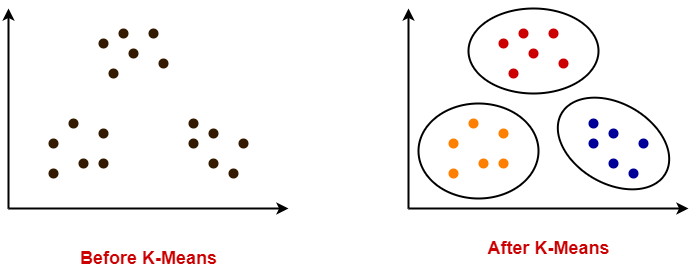

## Looking Deeper



1.   K centroids are randomly placed to form intial clusters
2.   Each data point is assigned to its nearest centroid
3. The centroid's location is updated based on the location of the data points t
4. Steps 2 and 3 are repeated until clusters and centroids no longer change.





In [1]:
import pandas as pd
filename = r"C:\Users\pjs5\Downloads\diabetes_dataset_with_notes.csv"
df = pd.read_csv(filename)


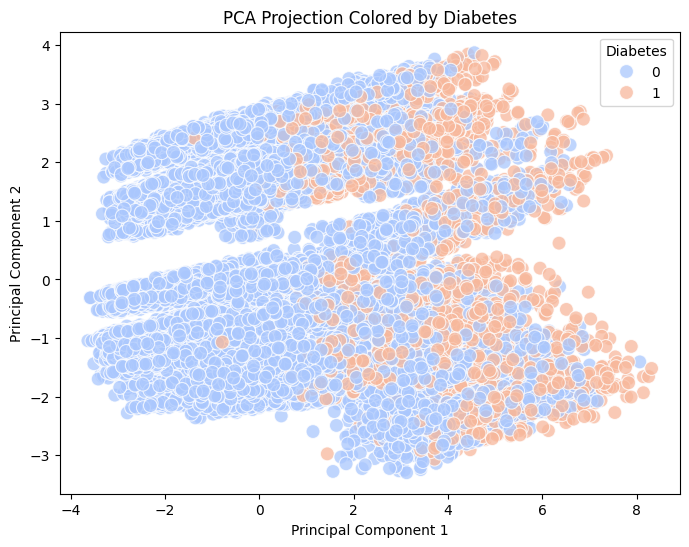

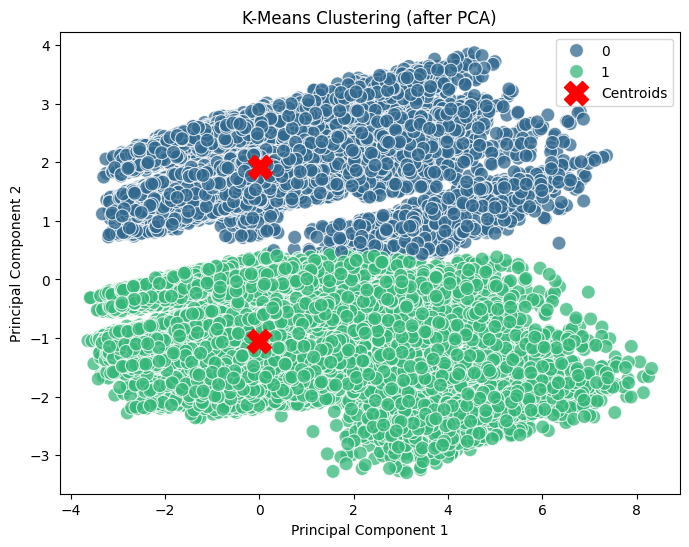

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_numeric = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

if 'diabetes' in df_numeric.columns:
    diabetes_labels = df_numeric['diabetes']
    df_numeric = df_numeric.drop(columns=['diabetes'])
else:
    raise ValueError("The 'diabetes' column is not in the dataset.")

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca['diabetes'] = diabetes_labels.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='diabetes', palette='coolwarm', s=100, alpha=0.75)
plt.title('PCA Projection Colored by Diabetes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diabetes')
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Here we see that K-Means Clustering identifies two reasonable clusters that appear to have separation. If a variable is known to be separable, this method can work very well if labels are not avaialble. Unfortunately, from comparing the graph where the diabetes binary indicator is plotted with the K-Means Cluster plot, we can see that the data is not clearly separable along these two principal components. Thus, the clusters are not very useful in this case. 